#Network Intrusion Detection

In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

# Loading the dataset

In [ ]:
  df = pd.read_csv("/content/networkintrusion.csv")

# Summarizing the Dataset

# Data Pre-processing and Cleaning

In [ ]:
# Drop the missing values
df.dropna()
df.fillna(0)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794.0,333.0,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317.0,938.0,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540.0,8314.0,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22542,0,udp,domain_u,SF,42.0,42.0,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [ ]:
# One Hot Encoding for categorial columns
categorical_columns = ['protocol_type', 'service', 'flag']
df = pd.get_dummies(df, columns=categorical_columns)

In [ ]:
  # To Seperate target variables and Variables
  X = df.drop(columns=['class'])
  Y = df['class']
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# Create and train a Decision Tree Classifier
decision_trees =[]
for i in range(15):
  clf = DecisionTreeClassifier()
  clf.fit(X_train, Y_train)
  decision_trees.append(clf)
individual_predictions = [tree.predict(X_test) for tree in decision_trees]
individual_predictions_df = pd.DataFrame({f"Classifier {i + 1}": predictions for i, predictions in enumerate(individual_predictions)})
print(individual_predictions_df)


     Classifier 1 Classifier 2 Classifier 3 Classifier 4 Classifier 5  \
0          normal       normal       normal       normal       normal   
1         anomaly      anomaly      anomaly      anomaly      anomaly   
2          normal       normal       normal       normal       normal   
3          normal       normal       normal       normal       normal   
4          normal       normal       normal       normal       normal   
...           ...          ...          ...          ...          ...   
4504      anomaly      anomaly      anomaly      anomaly      anomaly   
4505       normal       normal       normal       normal       normal   
4506      anomaly      anomaly      anomaly      anomaly      anomaly   
4507      anomaly      anomaly      anomaly      anomaly      anomaly   
4508       normal       normal       normal       normal       normal   

     Classifier 6 Classifier 7 Classifier 8 Classifier 9 Classifier 10  \
0          normal       normal       normal      

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from statistics import mode
rf = RandomForestClassifier(n_estimators=15, random_state=42)
rf.fit(X_train, Y_train)
super_prediction = [mode(predictions) for predictions in zip(*individual_predictions)]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, super_prediction)
print(f"Super Prediction Accuracy: {accuracy*100}")
report = classification_report(Y_test, super_prediction)
print(report)


Super Prediction Accuracy: 98.35883787979597
              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      2584
      normal       0.98      0.98      0.98      1925

    accuracy                           0.98      4509
   macro avg       0.98      0.98      0.98      4509
weighted avg       0.98      0.98      0.98      4509



**KNN MODEL**


Accuracy: 97.78221335107563
Confusion Matrix:
[[2532   52]
 [  48 1877]]
Classification Report:
              precision    recall  f1-score   support

     anomaly       0.98      0.98      0.98      2584
      normal       0.97      0.98      0.97      1925

    accuracy                           0.98      4509
   macro avg       0.98      0.98      0.98      4509
weighted avg       0.98      0.98      0.98      4509



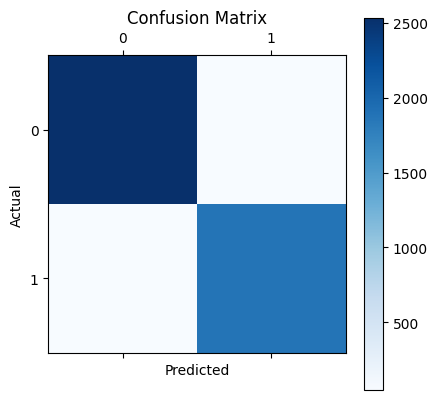

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

accuracy = (accuracy_score(Y_test, Y_pred))*100
confusion = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

plt.matshow(confusion, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

